In [1]:
import pandas as pd

In [2]:
from google.cloud import bigquery

In [3]:
client = bigquery.Client()

In [4]:

# Define a query to get the latest events related to "climate change"
query = """
SELECT 
    DATE(PARSE_DATE('%Y%m%d', CAST(SQLDATE AS STRING))) AS Date,
    SOURCEURL,
    AvgTone,
    EventRootCode
FROM `gdelt-bq.gdeltv2.events`
WHERE (Actor1CountryCode = 'SOM' OR Actor2CountryCode = 'SOM')
AND DATE(PARSE_DATE('%Y%m%d', CAST(SQLDATE AS STRING))) 
    BETWEEN DATE '2023-01-01' AND DATE '2023-12-31'
ORDER BY Date DESC
LIMIT 1000
"""

# Run the query and store the result in a DataFrame
df = client.query(query).to_dataframe()

print(df.head())

c:\Users\LENOVO\anaconda3\envs\hertie_climate_migration\lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


         Date                                          SOURCEURL   AvgTone  \
0  2023-12-31  https://www.thenews.com.pk/print/1143474-somal...  1.456311   
1  2023-12-31  https://www.arabnews.com/node/2434381/saudi-ar...  1.773050   
2  2023-12-31  https://www.zawya.com/en/world/africa/somalia-... -3.274559   
3  2023-12-31  https://www.africa-newsroom.com/press/african-...  3.483309   
4  2023-12-31  http://www.businessghana.com/site/news/politic... -3.859348   

  EventRootCode  
0            04  
1            19  
2            10  
3            06  
4            04  


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

<Axes: xlabel='Date'>

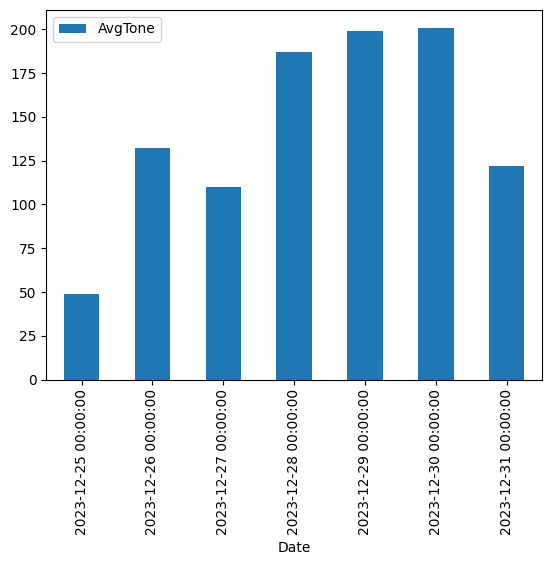

In [6]:
df.groupby('Date').count().plot(y='AvgTone', kind='bar')

In [ ]:
min_date_str = df['Date'].min().strftime('%Y-%m-%d')
max_date_str = df['Date'].max().strftime('%Y-%m-%d')


df.to_csv(f'data/somalia_climate_change_from_{min_date_str}_to_{max_date_str}.csv', index=False)